In [2]:
# Libraries
%matplotlib inline
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
pd.options.display.max_colwidth = 150 ###
import numpy as np
import re
import sys
import os
import matplotlib.pyplot as plt
# Add the directory containing visualization_utils.py to path
sys.path.append("/Users/debr/English-Homer/")
import visualization_utils as viz
import seaborn as sns
sns.set_style("whitegrid")
# palette astroblue   orange   genoa      carrot    tawny     neptune      SELAGO    mako   black
color = ['#003D59', '#FD6626','#177070','#FB871D','#641B5E','#86C3BC','#F5E1FD','#414A4F','k']
danB_plotstyle = {'figure.figsize': (12, 7), 
               'axes.labelsize': 'large', # fontsize for x and y labels (was large)
               'axes.titlesize': 'large', # fontsize for title
               'axes.titleweight': 'bold', # font type for title
               'xtick.labelsize': 'large', # fontsize for x 
               'ytick.labelsize':'small', # fontsize fory ticks
               'grid.color': 'k', # grid color
                'grid.linestyle': ':', # grid line style
                'grid.linewidth': 0.2, # grid line width
                'font.family': 'Times New Roman', # font family
                'grid.alpha': 0.5, # transparency of grid
               'figure.dpi': 300, # figure display resolution
               'savefig.bbox': 'tight', # tight bounding box
               'savefig.pad_inches': 0.4, # padding to use when saving
               'axes.titlepad': 15, # title padding
               'axes.labelpad': 8, # label padding
               'legend.borderpad': .6, # legend border padding
               'axes.prop_cycle': plt.cycler(
                color=color) # color cycle for plot lines
               }

# adjust matplotlib defaults
plt.rcParams.update(danB_plotstyle)

In [13]:
# Load CSVs
filepath_Wilson = "/Users/debr/odysseys_en/Odyssey_dfs/Odyssey_Wilson_eda_END.csv"
filepath_Green = "/Users/debr/odysseys_en/Odyssey_dfs/Odyssey_Green_eda_END.csv"

df_W = pd.read_csv(filepath_Wilson)
df_G = pd.read_csv(filepath_Green)

# Add translation label
df_W["translation"] = "Wilson"
df_G["translation"] = "Green"

# Keep only necessary columns: book number & tokens
df_W = df_W[["book_num", "tokens", "translation"]]
df_G = df_G[["book_num", "tokens", "translation"]]

# Combine both into one DataFrame
df = pd.concat([df_W, df_G], ignore_index=True)

# Ensure tokens are stored as lists (if stored as strings, convert them)
df["tokens"] = df["tokens"].apply(lambda x: eval(x) if isinstance(x, str) else x)

df

,book_num,tokens,translation
0,1,"[tell, complicated, man, muse, tell, wandered, lost, wrecked, holy, town, troy, went, met, pain, suﬀered, storms, sea, worked, save, life, bring, ...",Wilson
1,2,"[dangerous, journey, early, dawn, born, fingers, bloomed, odysseus, well-beloved, son, jumped, put, clothes, strapped, sword, across, back, tied, ...",Wilson
2,3,"[old, king, remembers, leaving, ocean, streams, sun, leapt, sky, bronze, shine, light, gods, mortals, fertile, earth, telemachus, arrived, pylos, ...",Wilson
3,4,"[sea, god, said, came, sparta, land, caves, valleys, drove, menelaus, house, found, hosting, wedding, feast, many, guests, celebrate, children, ma...",Wilson
4,5,"[goddess, storm, dawn, rose, bed, lord, tithonus, bring, light, deathless, gods, mortals, gods, sat, council, great, thunderlord, zeus, athena, co...",Wilson
5,6,"[princess, laundry, odysseus, suﬀered, exhaustion, long, ordeals, hero, slept, meanwhile, athena, went, phaeacians, people, used, live, hyperia, l...",Wilson
6,7,"[magical, kingdom, odysseus, sat, patiently, prayed, meanwhile, fine, strong, mules, conveyed, girl, town, reached, father, palace, gate, brothers...",Wilson
7,8,"[songs, poet, soon, dawn, appeared, touched, sky, roses, majestic, holy, king, alcinous, leapt, bed, odysseus, city-sacker, blessed, king, mighty,...",Wilson
8,9,"[pirate, shepherd, cave, wily, odysseus, lord, lies, answered, lord, alcinous, great, king, splendid, thing, hear, poet, talented, voice, godlike,...",Wilson
9,10,"[winds, witch, reached, floating, island, aeolus, well, loved, deathless, gods, around, sheer, cliﬀs, runs, wall, solid, bronze, impregnable, twel...",Wilson


In [14]:
#Boolean check for missing values
if df.isna().sum().sum() == 0:
    print("No missing values")
else:
    for col in df.columns:
        if df[col].isna().sum() > 0:
            print(f"Missing values in {col}")

No missing values


# Comparative Literary Translation Analysis: Lexical Diversity

## 1. Type-Token Ratio (TTR)

Type-token ratio is a fundamental measure of lexical diversity in a text, calculated by dividing the number of unique words (types) by the total number of words (tokens) in a text. This ratio provides insight into the richness and variety of vocabulary employed by a writer or translator.

It is important regarding comparing literary translations because it allows us to quantify how translators differ in their lexical choices when rendering the same source text. A higher TTR suggests a more diverse vocabulary, which may indicate a translator's attempt to capture nuanced meanings or stylistic elements of the original work. Conversely, a lower TTR might suggest a more repetitive or constrained vocabulary, potentially reflecting a focus on accessibility, consistency, or adherence to the source text's own lexical patterns.

The Type-Token Ratio (TTR) formula to be implemented in python is:

$$
TTR = \left( \frac{\text{Number of Unique Words}}{\text{Total Word Count}} \right) \times 100
$$

### Hypothesis Testing

For our comparative analysis of Green and Wilson's translations, we establish the following hypotheses:

**H₀: The lexical diversity between Green and Wilson's translations is the same.**  
**H₁: The lexical diversity of the two texts is different.**

In statistical terms:
- **H₀ (Null Hypothesis)**: There is no significant variation between the TTR values of the two translations.
- **H₁ (Alternative Hypothesis)**: There is a significant variation between their TTR values.

### Statistical Testing Approach

I will employ the t-test to determine whether any observed differences in TTR between the two translations are statistically significant or merely due to chance. This test is appropriate for comparing means between two independent samples.

### Interpretation of Results

- If p-value < 0.05, we reject H₀, indicating a statistically significant difference in lexical diversity between the translations.
- If p-value ≥ 0.05, we fail to reject H₀, suggesting that any observed differences in lexical diversity may be attributable to random variation rather than substantive differences in translation approach.

### Implications for Translation Analysis

From this statistical analysis, we can infer whether Green and Wilson employed significantly different vocabulary choices in their translations. This may reflect:

1. Different translation philosophies (e.g., domestication vs. foreignization)
2. Differences in target audience considerations
3. Temporal factors related to when each translation was produced
4. Individual stylistic preferences of the translators
5. Varying interpretations of the source text's meaning and aesthetic qualities

This quantitative approach provides an objective foundation for more nuanced qualitative analysis of how these translators have interpreted and rendered the original work.


In [17]:
# Compute type-token ratio (TTR) for each book

import scipy.stats as stats

# Compute TTR
df["ttr"] = df["tokens"].apply(lambda x: len(set(x)) / len(x) if x else 0)

# Separate TTRs for the two translations
ttr_wilson = df[df["translation"] == "Wilson"]["ttr"].tolist()
ttr_green = df[df["translation"] == "Green"]["ttr"].tolist()

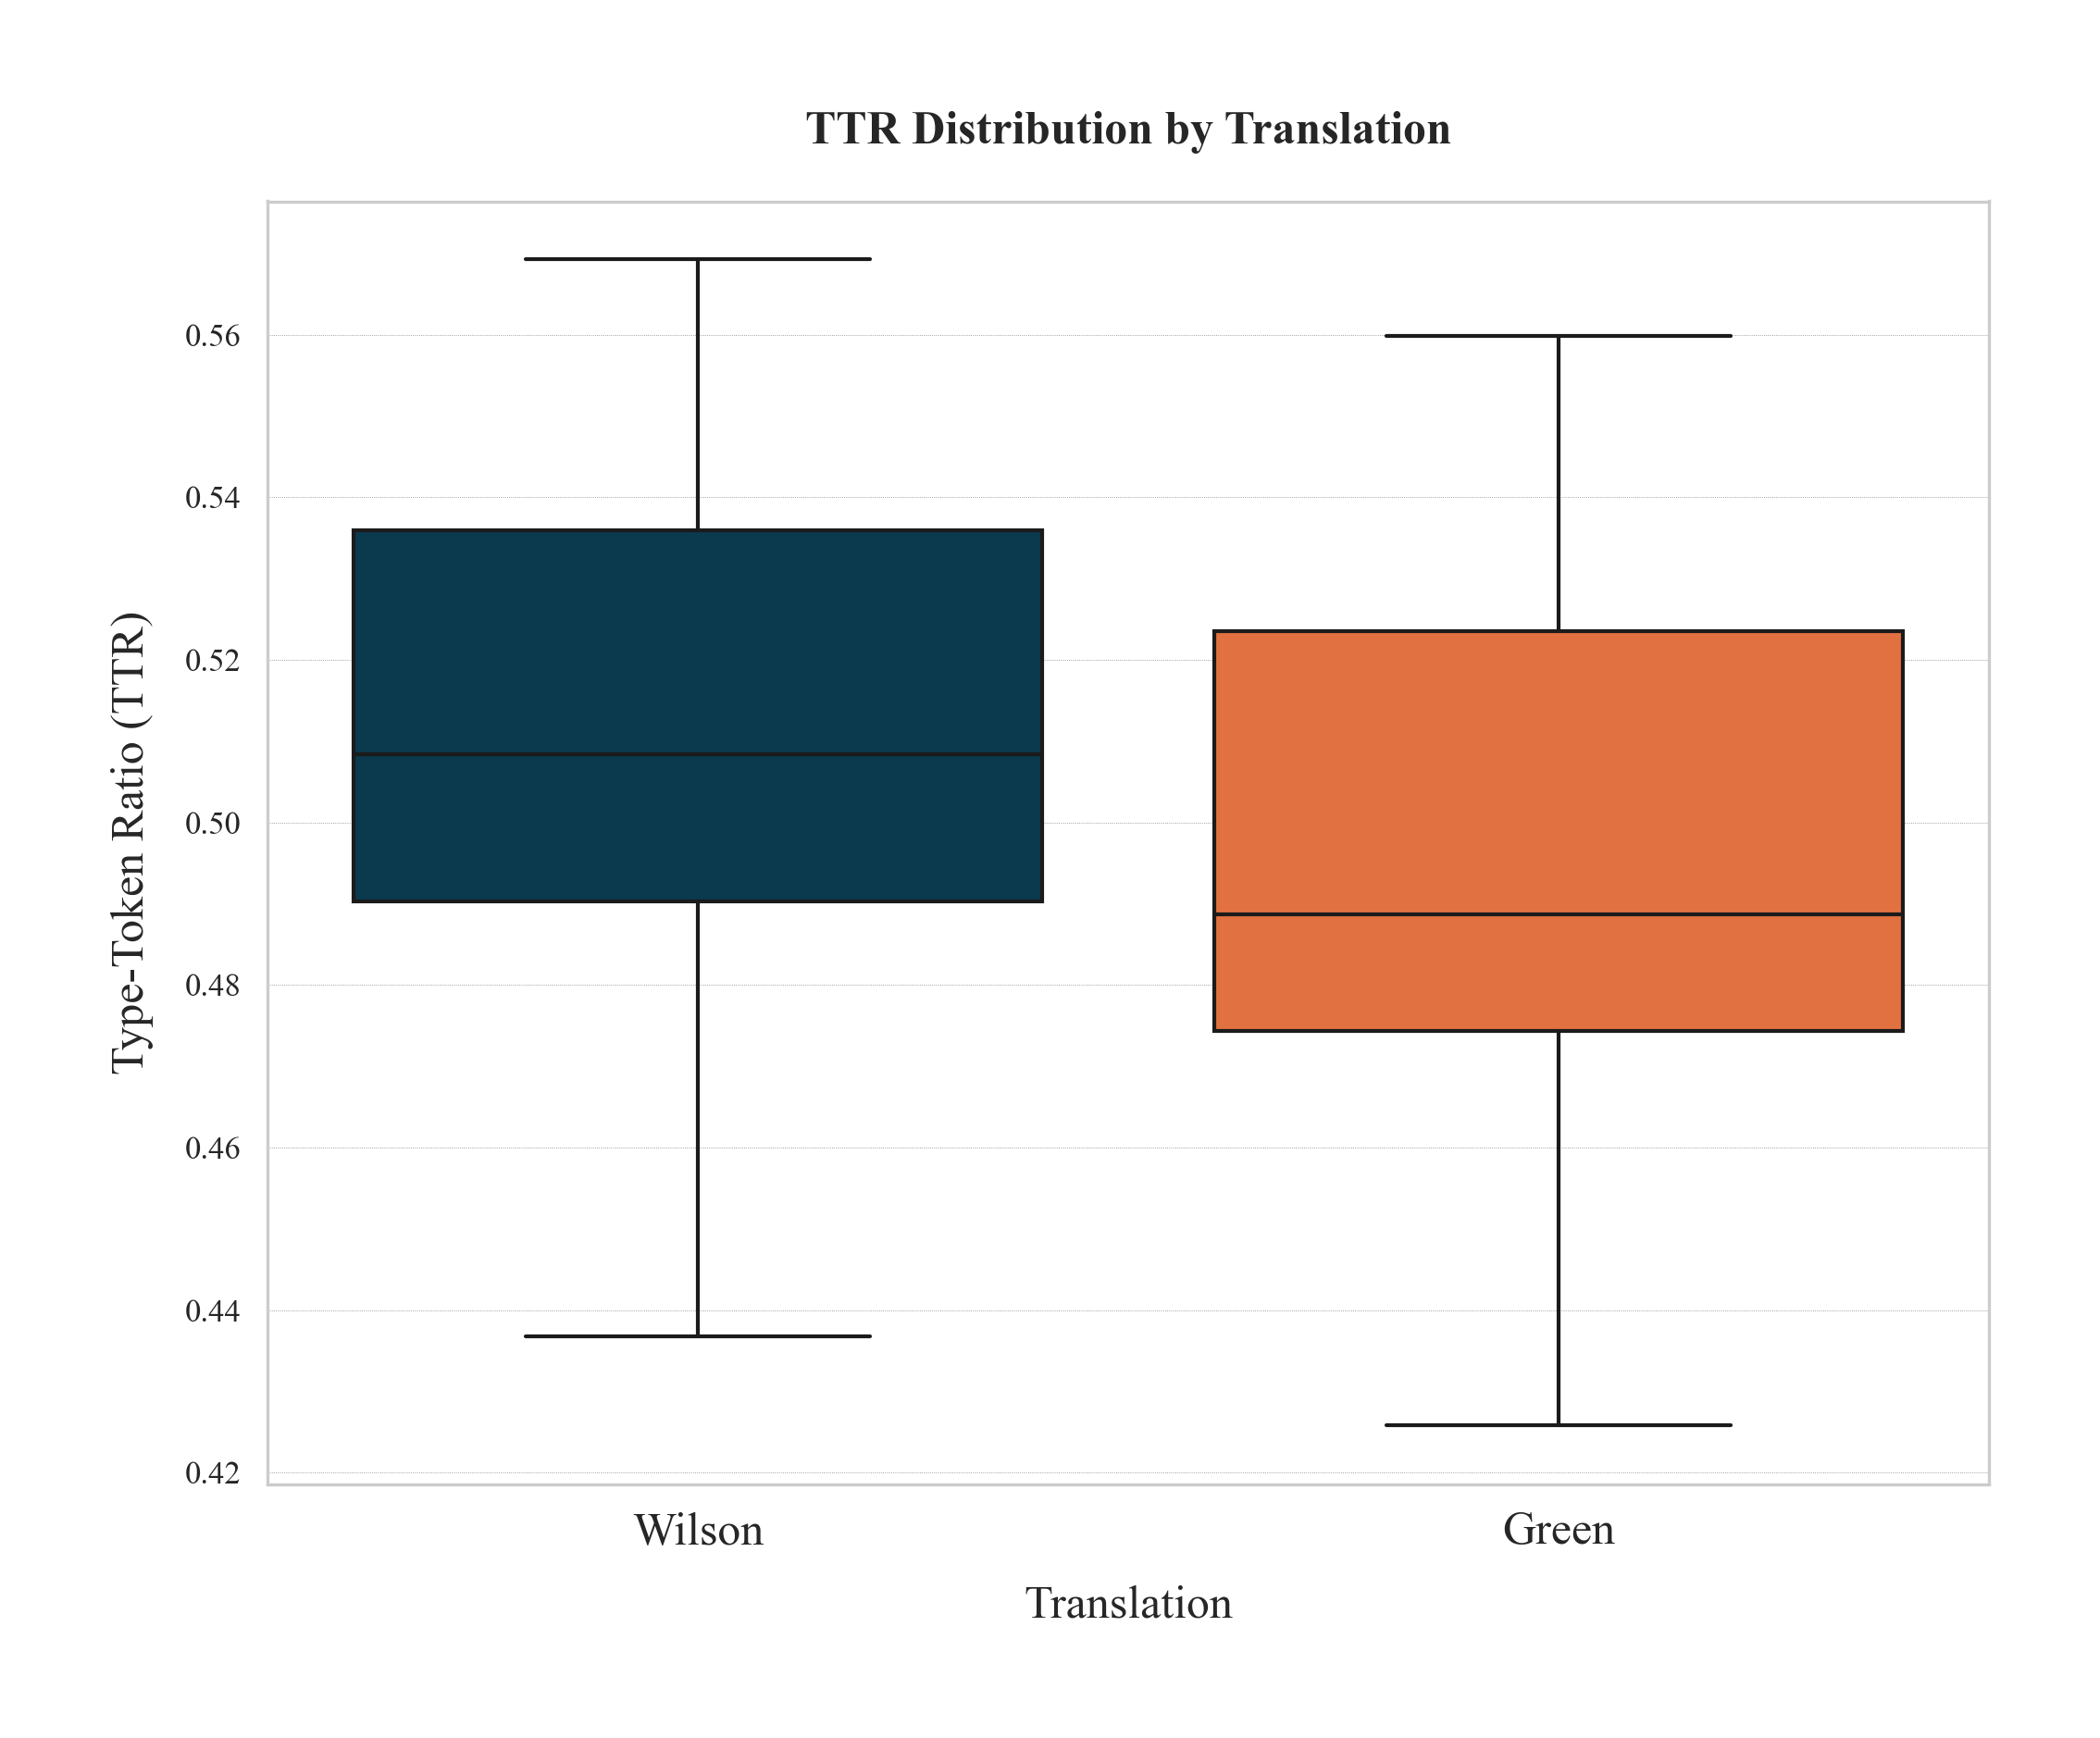

In [ ]:
# Create a boxplot for TTR values
sns.boxplot(x=df["translation"], y=df["ttr"], palette=color)
plt.title("TTR Distribution by Translation")
plt.xlabel("Translation")
plt.ylabel("Type-Token Ratio (TTR)")
plt.show()

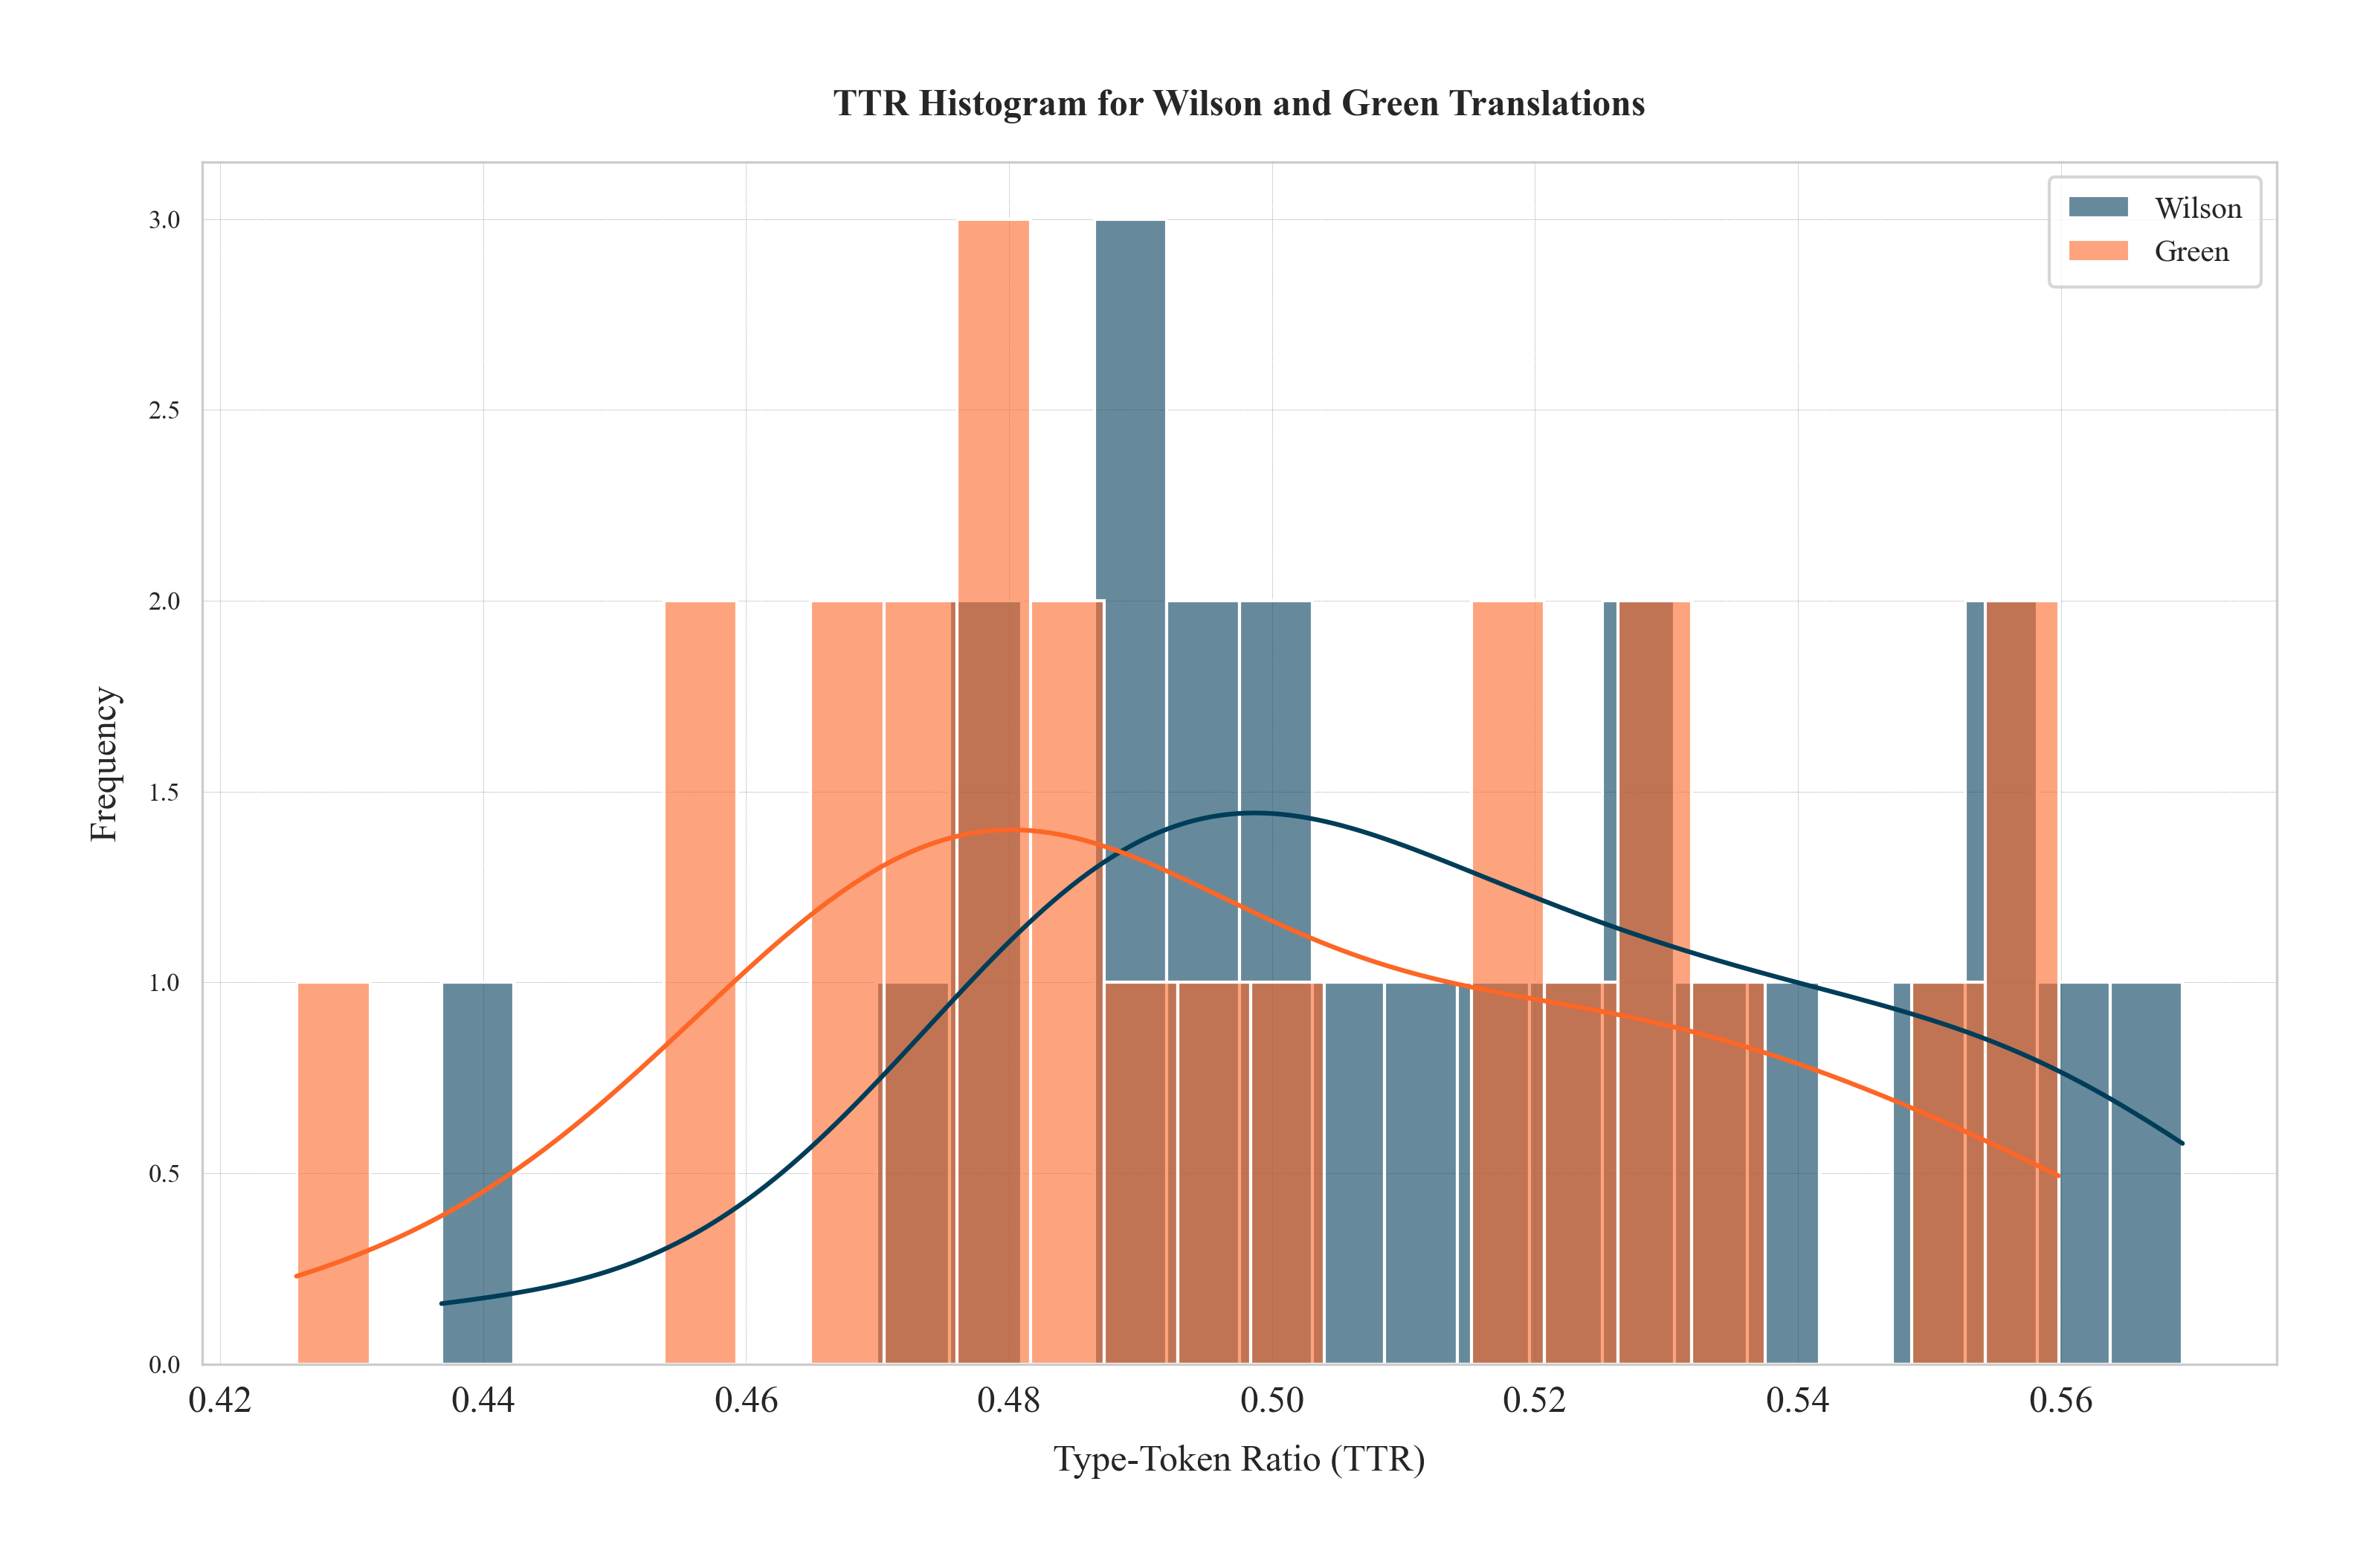

In [ ]:
# Create a histogram for TTR values
# Plot histogram for Wilson and Green translations
sns.histplot(ttr_wilson, bins=24, label="Wilson", kde=True, alpha=0.6)
sns.histplot(ttr_green, bins=24, label="Green", kde=True, alpha=0.6)
# Add labels and legend
plt.title("TTR Histogram for Wilson and Green Translations")
plt.xlabel("Type-Token Ratio (TTR)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

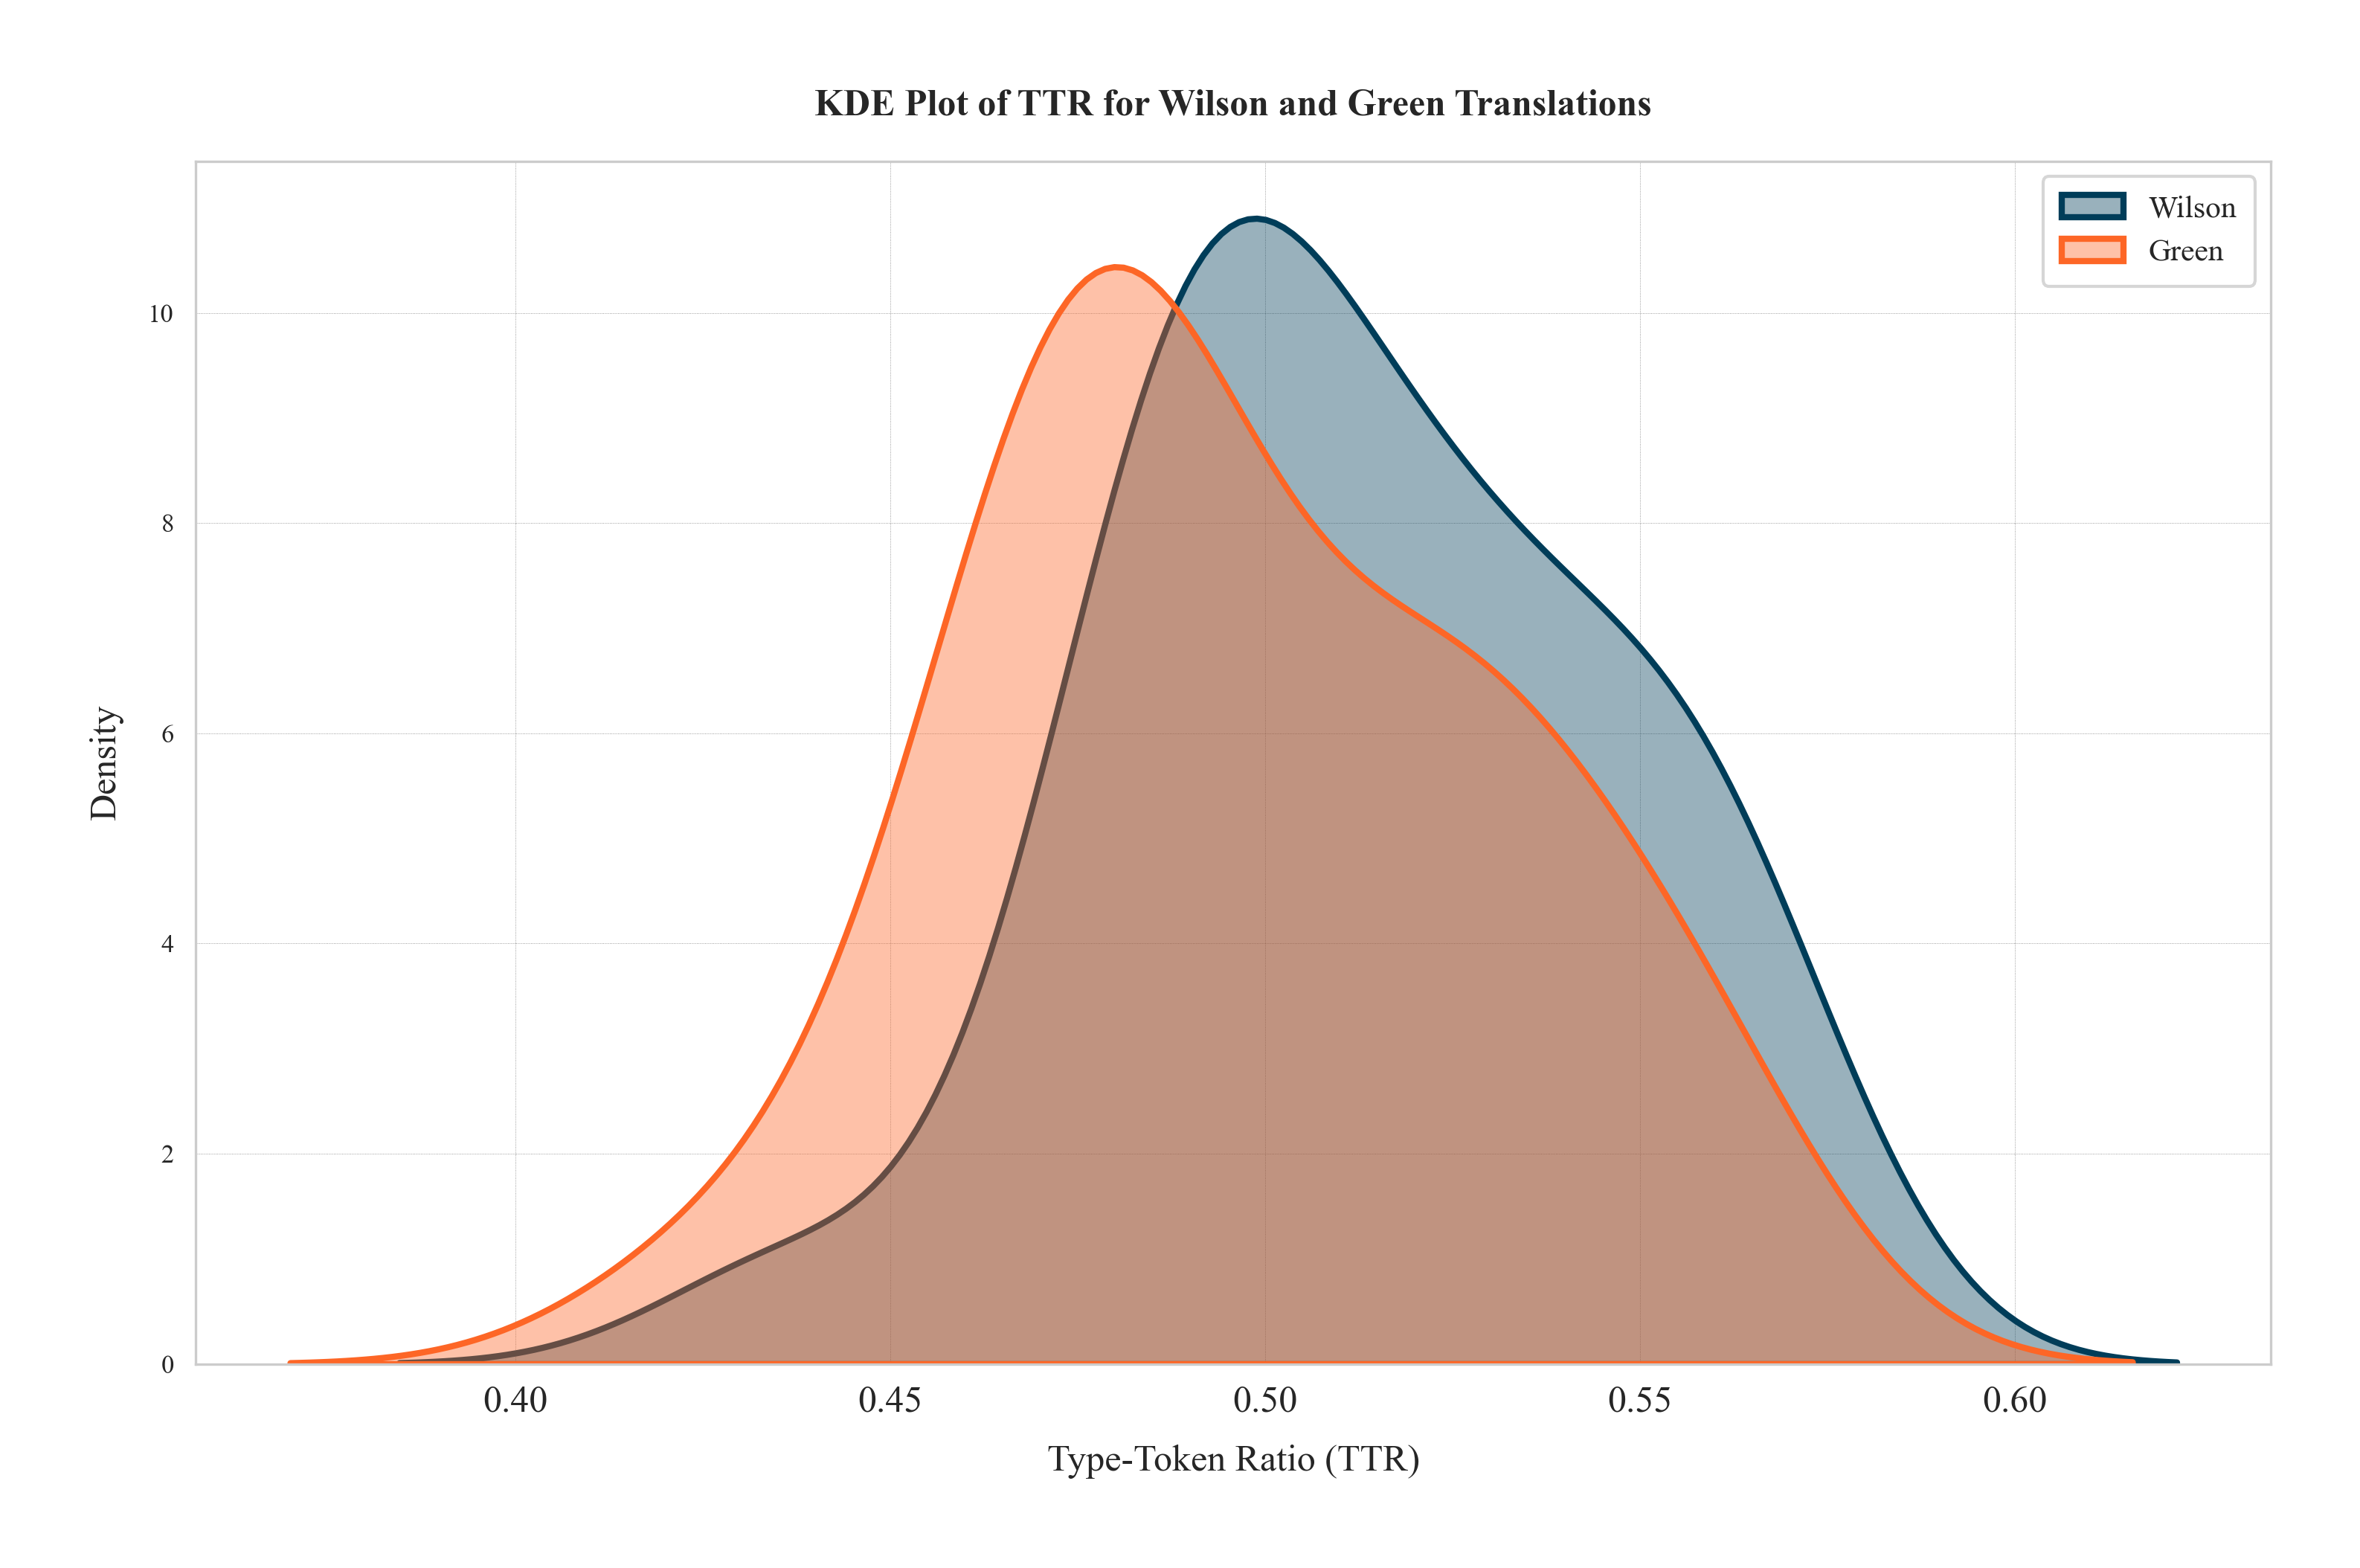

In [34]:
# KDE plot for Wilson and Green translations
sns.kdeplot(ttr_wilson, fill=True, label="Wilson", alpha=0.4, linewidth=2)
sns.kdeplot(ttr_green, fill=True, label="Green", alpha=0.4, linewidth=2)

plt.title("KDE Plot of TTR for Wilson and Green Translations")
plt.xlabel("Type-Token Ratio (TTR)")
plt.ylabel("Density")
plt.legend()
plt.show()

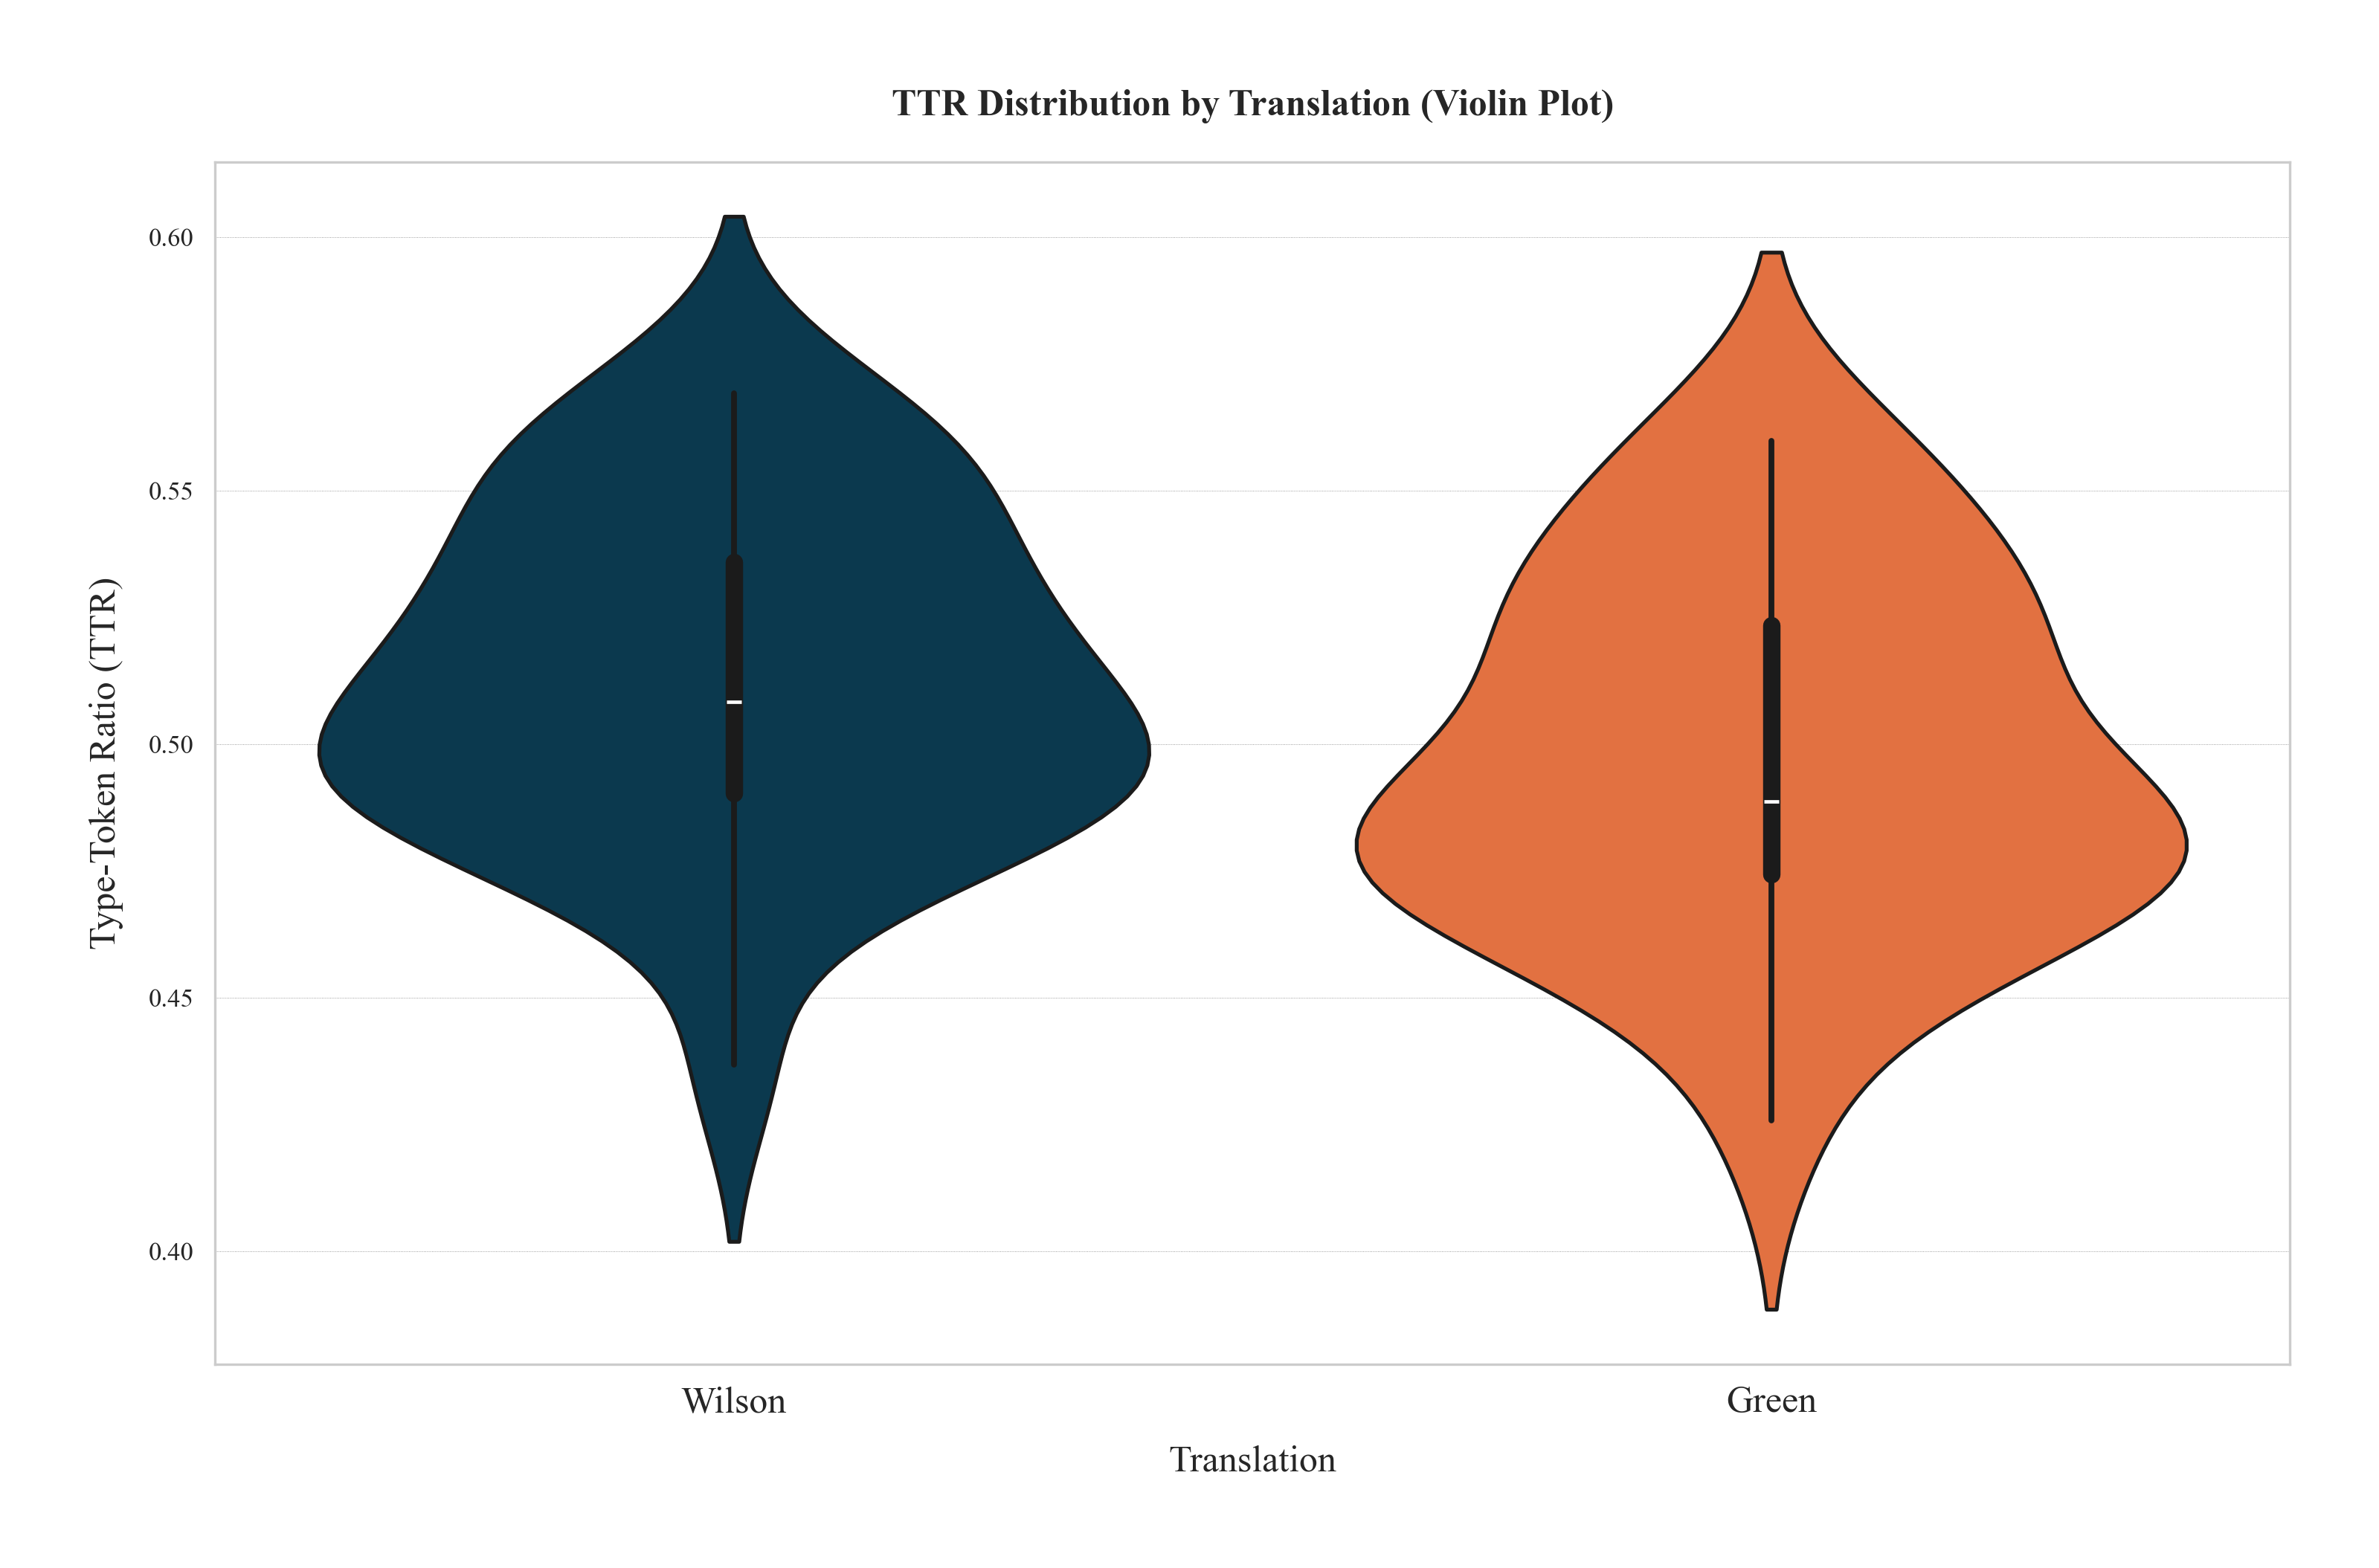

In [31]:
# Create a violin plot for TTR values
sns.violinplot(x=df["translation"], y=df["ttr"], palette=color)
plt.title("TTR Distribution by Translation (Violin Plot)")
plt.xlabel("Translation")
plt.ylabel("Type-Token Ratio (TTR)")
plt.show()

In [20]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(ttr_wilson, ttr_green)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("The difference in TTR between Wilson and Green is statistically significant.")
else:
    print("The difference in TTR between Wilson and Green is not statistically significant.")

T-statistic: 1.609495189629532, P-value: 0.11435036074503503
The difference in TTR between Wilson and Green is not statistically significant.


# Discussion of Type-Token Ratio Analysis Results

## Statistical Findings and Their Implications

The t-test comparing the Type-Token Ratios (TTR) between Wilson's and Green's translations yielded results that did not reach the threshold for statistical significance (p ≥ 0.05). This means we fail to reject the null hypothesis (H₀) that the lexical diversity between Green and Wilson's translations is the same.

## Interpreting Non-Significant Results

While we did not detect a statistically significant difference, this finding itself is meaningful within translation studies. The absence of a significant difference does not represent a failure of the analysis, but rather provides evidence for an important theoretical perspective: translators working within similar cultural-temporal contexts may demonstrate comparable lexical diversity despite individual stylistic preferences.

## Cultural and Contextual Influences

These results support the theory that translators are products of their time and cultural milieu. Both Wilson and Green, as contemporaries, likely:

1. **Shared linguistic resources**: Access to similar lexical resources and translation tools of their era
2. **Operated within common translation norms**: Adherence to prevailing standards and expectations in literary translation
3. **Responded to similar audience expectations**: Accommodation to contemporary readers' preferences and comprehension levels
4. **Were informed by comparable theoretical frameworks**: Influence of translation theories dominant during their working period

## Beyond Statistical Significance

This finding invites us to look beyond mere statistical differences to consider the subtle ways translators negotiate between:

- Fidelity to the source text
- Readability for the target audience
- Literary aesthetics and stylistic considerations
- Cultural and temporal adaptation

The similar TTR values suggest that both translators achieved comparable lexical diversity while potentially making different word choices. This highlights the complexity of translation as both an art and science, where multiple valid approaches can yield texts with similar quantitative measures of diversity.

## Implications for Translation Theory

These results support the view that translators operate within what Bourdieu would call a "field" - a structured social space with its own rules and capital. The comparable TTR values indicate that both translators have internalized similar dispositions (habitus) regarding appropriate lexical diversity in literary translation, despite potentially different translational choices at the sentence or phrase level.

## Future Research Directions

To build upon these findings, future research might:

1. Examine qualitative differences in word choice and register between the translations
2. Analyze other linguistic features such as sentence length, syntactic complexity, or metaphor preservation
3. Compare these translators to others from distinctly different cultural-temporal contexts
4. Investigate reader responses to determine if comparable TTR values correspond to similar reader experiences

## Conclusion

The non-significant difference in TTR between Wilson and Green's translations reveals the subtle ways cultural context shapes translation practice. Far from being a null result, this finding contributes to our understanding of how translators, as cultural mediators, are influenced by their shared temporal and social contexts while exercising individual agency within those constraints.